CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

C:\Users\hp\anaconda3\envs\sdv_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
from utils import get_mnist_data
train_data, test_data = get_mnist_data(train_transforms, test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

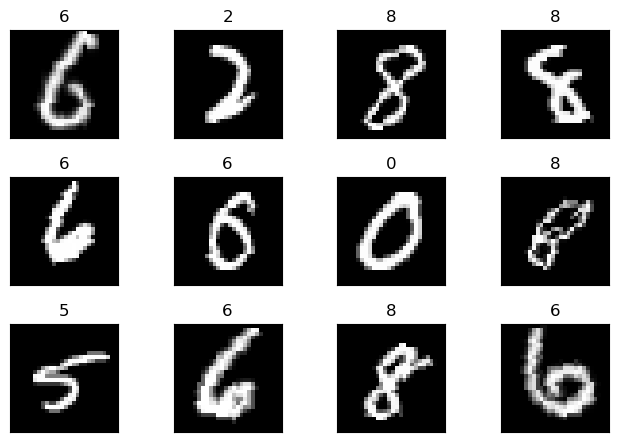

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [7]:
from model import Net

CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [9]:
from utils import train, test


CODE BLOCK: 10

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = Net().to(device)


optimizer = optim.SGD(model.parameters(), lr=00.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 10

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2735 Batch_id=117 Accuracy=51.52: 100%|████████████████████████| 118/118 [00:17<00:00,  6.58it/s]


Test set: Average loss: 0.0005, Accuracy: 9190/10000 (91.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2221 Batch_id=117 Accuracy=94.07: 100%|████████████████████████| 118/118 [00:11<00:00, 10.30it/s]


Test set: Average loss: 0.0002, Accuracy: 9694/10000 (96.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0672 Batch_id=117 Accuracy=96.29: 100%|████████████████████████| 118/118 [00:13<00:00,  8.87it/s]


Test set: Average loss: 0.0001, Accuracy: 9794/10000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0819 Batch_id=117 Accuracy=97.04: 100%|████████████████████████| 118/118 [00:13<00:00,  9.06it/s]


Test set: Average loss: 0.0001, Accuracy: 9845/10000 (98.45%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0903 Batch_id=117 Accuracy=97.63: 100%|████████████████████████| 118/118 [00:12<00:00,  9.47it/s]


Test set: Average loss: 0.0001, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0825 Batch_id=117 Accuracy=97.87: 100%|████████████████████████| 118/118 [00:13<00:00,  8.44it/s]


Test set: Average loss: 0.0001, Accuracy: 9851/10000 (98.51%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0782 Batch_id=117 Accuracy=98.10: 100%|████████████████████████| 118/118 [00:14<00:00,  8.27it/s]


Test set: Average loss: 0.0001, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0908 Batch_id=117 Accuracy=98.21: 100%|████████████████████████| 118/118 [00:12<00:00,  9.23it/s]


Test set: Average loss: 0.0001, Accuracy: 9864/10000 (98.64%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0276 Batch_id=117 Accuracy=98.42: 100%|████████████████████████| 118/118 [00:16<00:00,  7.29it/s]


Test set: Average loss: 0.0001, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0963 Batch_id=117 Accuracy=98.54: 100%|████████████████████████| 118/118 [00:11<00:00, 10.01it/s]


Test set: Average loss: 0.0001, Accuracy: 9860/10000 (98.60%)

Adjusting learning rate of group 0 to 1.0000e-02.


CODE BLOCK: 11

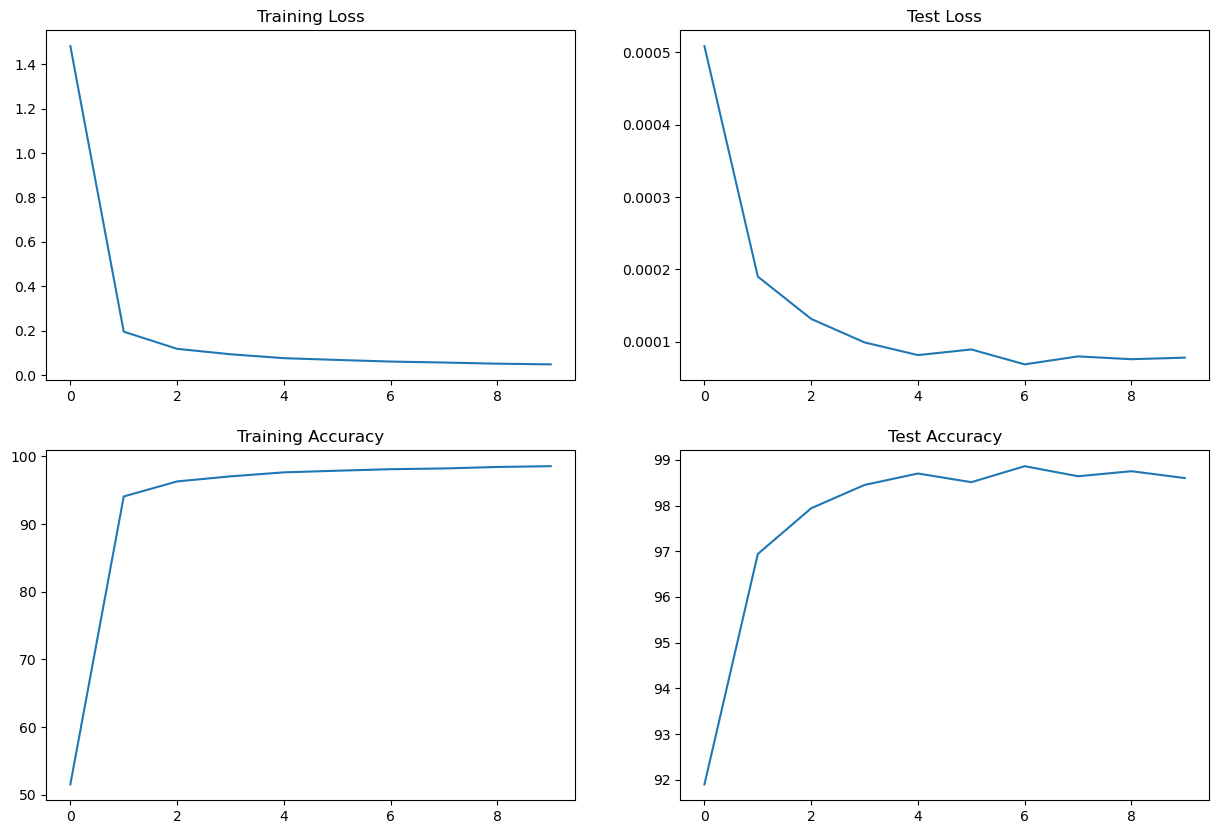

In [11]:
from utils import plot_loss_and_accuracy
plot_loss_and_accuracy(train_losses, train_acc, test_losses, test_acc)

In [12]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

ModuleNotFoundError: No module named 'torchsummary'